In [5]:
import torch
import matplotlib.pyplot as plt

In [6]:
# torch.arange(start, end, step) -> return Tensor
# Tensor.view(-1, 1) -> means to reshape to second dimension size = 1(1 column, row number auto inferred), without modifying the data
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor) 
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0

'''
data src = "https://machinelearningmastery.com/building-a-single-layer-neural-network-in-pytorch/"
'''

'\ndata src = "https://machinelearningmastery.com/building-a-single-layer-neural-network-in-pytorch/"\n'

In [7]:
X # observe its dimension

tensor([[-30.],
        [-29.],
        [-28.],
        [-27.],
        [-26.],
        [-25.],
        [-24.],
        [-23.],
        [-22.],
        [-21.],
        [-20.],
        [-19.],
        [-18.],
        [-17.],
        [-16.],
        [-15.],
        [-14.],
        [-13.],
        [-12.],
        [-11.],
        [-10.],
        [ -9.],
        [ -8.],
        [ -7.],
        [ -6.],
        [ -5.],
        [ -4.],
        [ -3.],
        [ -2.],
        [ -1.],
        [  0.],
        [  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.]])

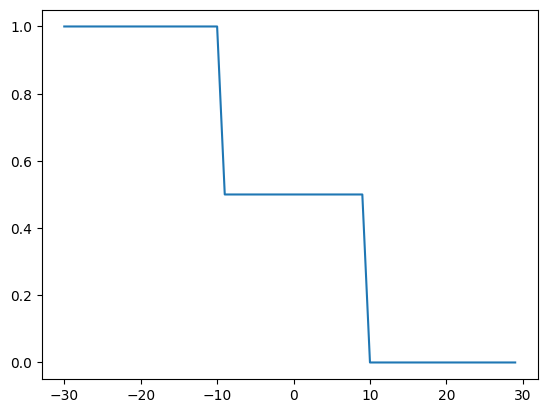

In [8]:
plt.plot(X, Y)
plt.show()

In [9]:
# Define the class for NN with one hidden layer

class two_layer_net(torch.nn.Module):    
    # Constructor
    def __init__(self, input_size, hidden_neurons1, hidden_neurons2, output_size):
        super(two_layer_net, self).__init__()
        # hidden layer 
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons1)
        self.linear_two = torch.nn.Linear(hidden_neurons1, hidden_neurons2)
        self.linear_three = torch.nn.Linear(hidden_neurons2, output_size) 
        

    # prediction function
    def forward(self, x): # x is the input mtx
        x = torch.sigmoid(self.linear_one(x))
        x = torch.tanh(self.linear_two(x))
        x = torch.sigmoid(self.linear_three(x))
        return x
    


model_hidden = two_layer_net(1,2,2,1)
# train the first model with single layer

def criterion_hidden(y_pred, y): # loss function
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out

'''
def criterion(y_pred, y): # convergence very slow because the numbers are small
    out = torch.mean(0.5 * (y - y_pred) ** 2)
    return out
'''

optimizer_hidden = torch.optim.SGD(model_hidden.parameters(), lr=0.01) # Stochastic gradient descent

1000 epochs done!


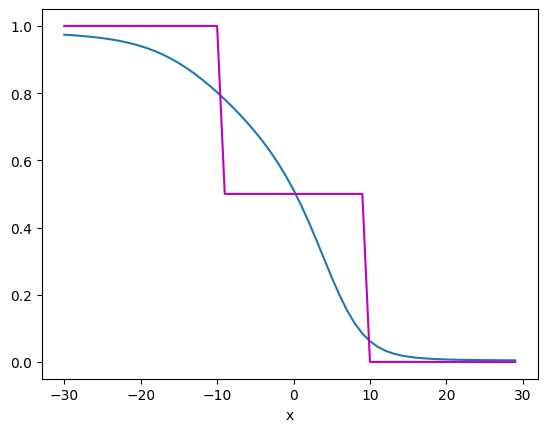

2000 epochs done!


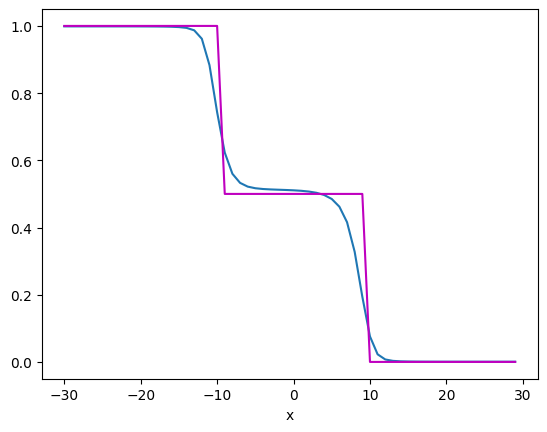

3000 epochs done!


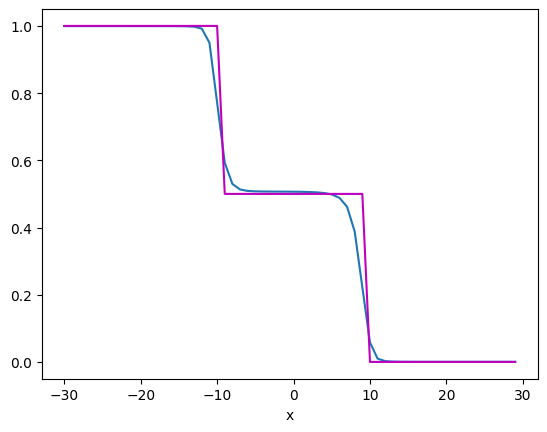

4000 epochs done!


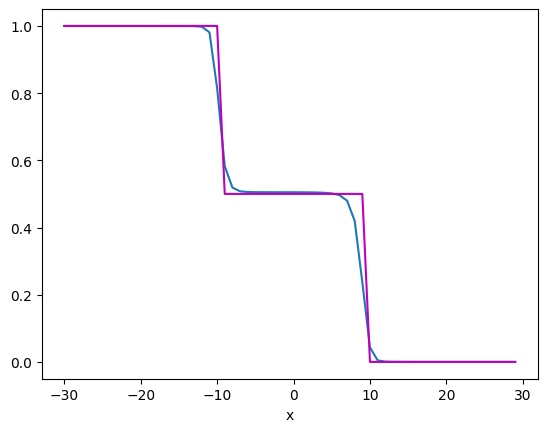

5000 epochs done!


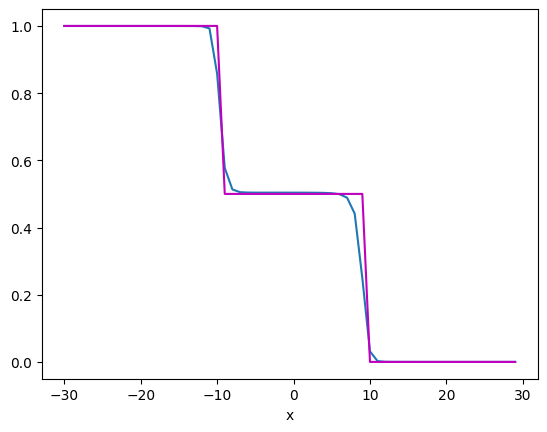

In [10]:
# Define the training loop
epochs=5000
cost_hidden = []
total=0
for epoch in range(epochs):
    total=0
    epoch = epoch + 1
    for x, y in zip(X, Y):
        yhat = model_hidden(x)
        loss = criterion_hidden(yhat, y)
        loss.backward() # computes the gradients for all nodes
        optimizer_hidden.step()
        optimizer_hidden.zero_grad() # reset the gradients
        # get total loss 
        total+=loss.item() 
    cost_hidden.append(total)
    if epoch % 1000 == 0:
        print(str(epoch)+ " " + "epochs done!") # visualze results after every 1000 epochs   
        # plot the result of function approximator
        plt.plot(X.numpy(), model_hidden(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), 'm')
        plt.xlabel('x')
        plt.show()

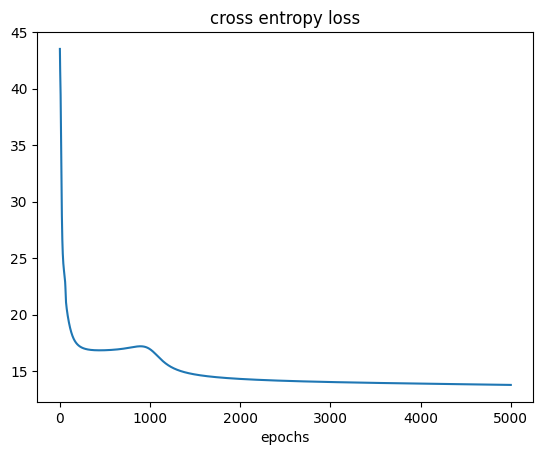

In [11]:
# plot the cost
plt.plot(cost_hidden)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()